In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf



mnthly_agg_dta = pd.read_csv('monthly_agg_sales.csv')
mnthly_agg_dta['month'] = pd.to_datetime(mnthly_agg_dta['month'])
mnthly_agg_dta.head()

,Sales,month
0,4851.080,2014-01-01
1,1071.724,2014-02-01
2,8605.879,2014-03-01
3,11155.074,2014-04-01
4,7135.624,2014-05-01


In [2]:
train_df = mnthly_agg_dta[(mnthly_agg_dta['month']) <= '2017-06-01']
train_df.shape

(42, 2)

In [3]:
test_df =  mnthly_agg_dta[(mnthly_agg_dta['month']) > '2017-06-01']                      
test_df.shape

(6, 2)

<Axes: >

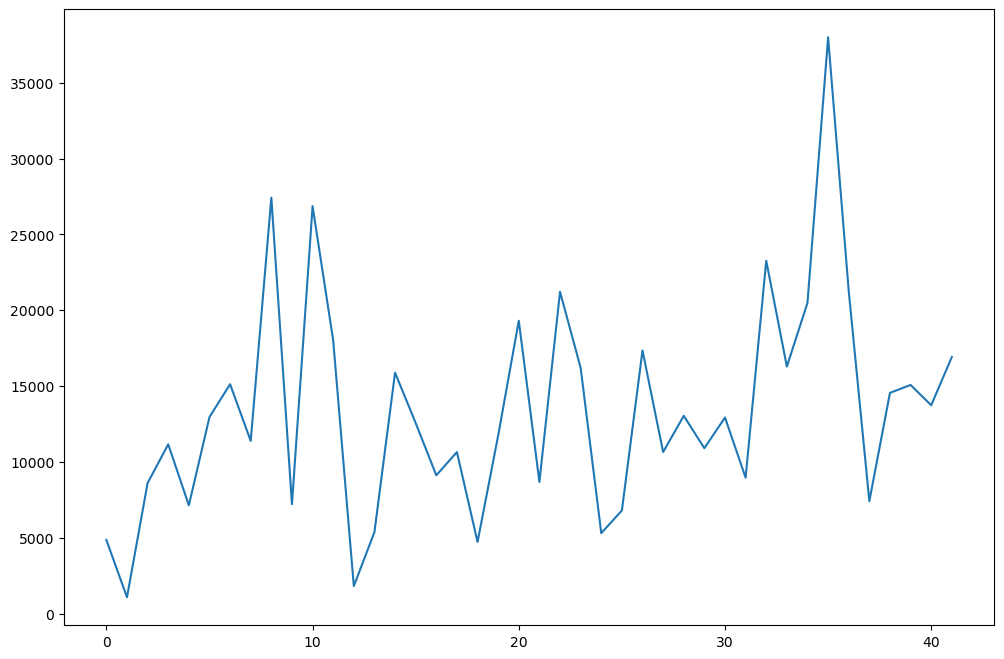

In [4]:
train_df['Sales'].plot(figsize=(12,8))

In [5]:
train_df.set_index('month',inplace = True)
test_df.set_index('month',inplace = True)

In [6]:
result = adfuller(train_df.Sales.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.288990
p-value: 0.000006


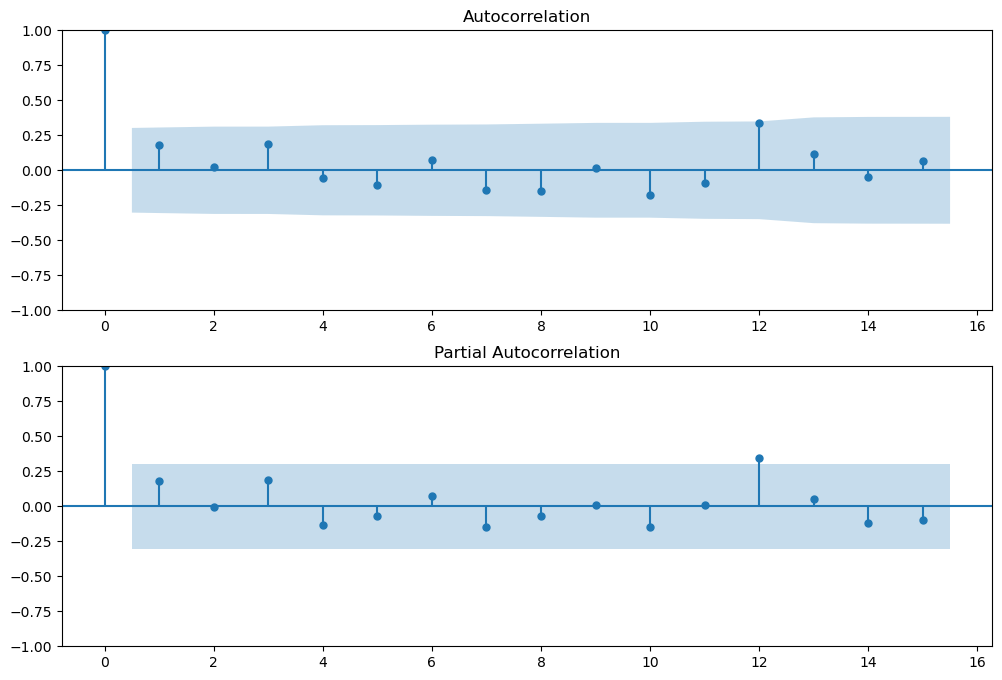

In [7]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(train_df['Sales'].dropna(),lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(train_df['Sales'].dropna(),lags=15,ax=ax2)

In [13]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_df.Sales,order=(1,0,1))
model_fit=model.fit()
model_fit.summary()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [14]:
full_data['forecast'] = model_fit.predict(start = 42, end = 48, dynamic = True)
full_data.tail(6)

NameError: name 'model_fit' is not defined

In [15]:
test_data = full_data.tail(6)
test_data
test_data['error'] = test_data.Sales - test_data.forecast
mape = np.round(np.mean(np.abs(100*test_data.error/test_data.Sales)), 0)
mape

NameError: name 'full_data' is not defined

In [16]:
full_data[['Sales','forecast']].plot(figsize = (12,8))

NameError: name 'full_data' is not defined

In [17]:
Can we improve ?

SyntaxError: invalid syntax (3776625413.py, line 1)

In [18]:
model = sm.tsa.statespace.SARIMAX(train_df.Sales, order=(1,1,1),seasonal_order = (1,1,1,12))
model_fit_seasonal = model.fit()
print(model_fit_seasonal.summary())

C:\Users\Suprith Shettigar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Suprith Shettigar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Suprith Shettigar\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   42
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -293.627
Date:                            Wed, 03 Jan 2024   AIC                            597.253
Time:                                    09:41:57   BIC                            604.090
Sample:                                01-01-2014   HQIC                           599.394
                                     - 06-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2673      0.486      0.550      0.583      -0.686       1.221
ma.L1         -0.7951      0.310   

In [19]:
full_data = pd.concat([train_df, test_df], axis=0)
full_data['forecast'] = model_fit_seasonal.predict(start = 36, end = 48, dynamic = True)
full_data.tail(6)

,Sales,forecast
month,,
2017-07-01,10241.468,20562.671202
2017-08-01,30059.852,19958.785425
2017-09-01,31895.843,31433.289801
2017-10-01,23037.192,22199.383982
2017-11-01,31472.337,30465.786522
2017-12-01,30436.942,36566.402247


In [20]:
test_data = full_data.tail(6)
test_data
test_data['error'] = test_data.Sales - test_data.forecast
mape = np.round(np.mean(np.abs(100*test_data.error/test_data.Sales)), 0)
mape

C:\Users\Suprith Shettigar\AppData\Local\Temp\ipykernel_15780\3636157251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['error'] = test_data.Sales - test_data.forecast


27.0

<Axes: xlabel='month'>

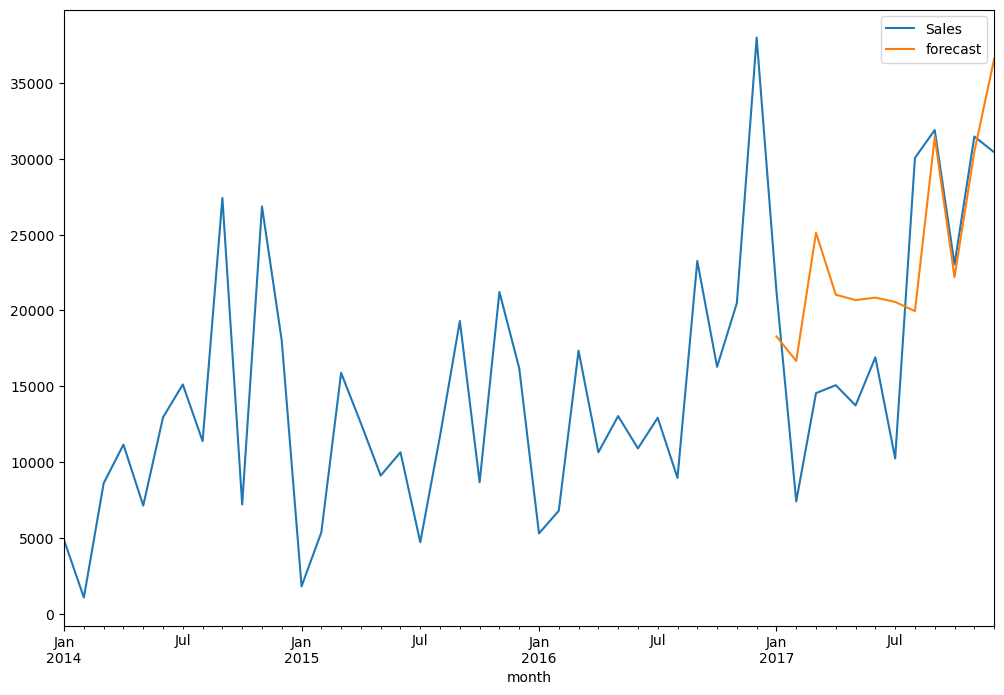

In [21]:
full_data[['Sales','forecast']].plot(figsize = (12,8))

In [22]:
import pandas as pd
sugar_data = pd.read_csv('sugar_cane.csv')
sugar_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'sugar_cane.csv'

In [23]:
sugar_data= sugar_data.set_index('Time')

NameError: name 'sugar_data' is not defined

In [24]:
result = adfuller(sugar_data.Yield.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

NameError: name 'sugar_data' is not defined

In [25]:
sugar_data_stationary = sugar_data - sugar_data.shift(1) #8
sugar_data_stationary.dropna(inplace=True)

dftest = adfuller(sugar_data_stationary, autolag='AIC')
dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])

print (dfoutput)

NameError: name 'sugar_data' is not defined